<h1> Dogs Vs Cats </h1>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
from imutils import paths

**Importing the Training Data**

In [4]:
imagePaths = list(paths.list_images("train/"))

In [5]:
len(imagePaths)

25000

**Creating The Training Dataset**

In [7]:
image=cv2.imread(imagePaths[0])

In [8]:
image.shape

(374, 500, 3)

In [9]:
import matplotlib.pyplot as plt

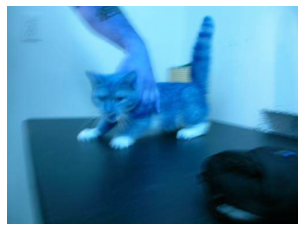

In [10]:
plt.axis('Off')
plt.imshow(image)

In [11]:
X=[]
Y=[]
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image=cv2.resize(image,(224,224))
    X.append(image)
    if imagePath[6]=='c':
        Y.append(0)
    else:
        Y.append(1)

In [12]:
X=np.array(X)
X.shape

(25000, 224, 224, 3)

In [13]:
Y=np.array(Y)
Y.shape

(25000,)

In [14]:
def plot(index):
    plt.axis("off")
    plt.imshow(X[index])
    print(Y[index])

1


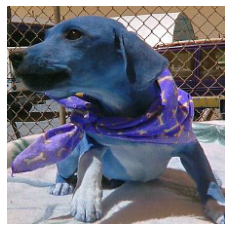

In [15]:
plot(20000)

**Importing the MobileNet**

In [16]:
import tensorflow as tf


''

In [17]:
IMG_SHAPE = image.shape
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

In [18]:
IMG_SHAPE

(224, 224, 3)

In [19]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

**Creating the Model**

In [20]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [21]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    return data_augmentation

In [22]:
def get_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape = (224,224,3),include_top=False, weights='imagenet')
    base_model.trainable=False
    inputs=tf.keras.Input(shape=(224,224,3))
    data_augmentation=data_augmenter()
    x=data_augmentation(inputs)
    x=preprocess_input(x)
    x=base_model(x,training=False)
    x=tf.keras.layers.GlobalAveragePooling2D()(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    outputs = tfl.Dense(2, activation='sigmoid')(x)
    model=tf.keras.Model(inputs=inputs,outputs=outputs)
    return model

In [23]:
model=get_model()

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=666)

**Training Begins :)**

In [27]:
import tensorflow as tf
# with tf.device('/GPU:0'):
history=model.fit(X_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
157/157 [==============================] - 359s 2s/step - loss: 0.1457 - Accuracy: 0.9423
Epoch 2/5
157/157 [==============================] - 308s 2s/step - loss: 0.1256 - Accuracy: 0.9494
Epoch 3/5
157/157 [==============================] - 342s 2s/step - loss: 0.1156 - Accuracy: 0.9539
Epoch 4/5
157/157 [==============================] - 414s 3s/step - loss: 0.1110 - Accuracy: 0.9566
Epoch 5/5
157/157 [==============================] - 344s 2s/step - loss: 0.1135 - Accuracy: 0.9546


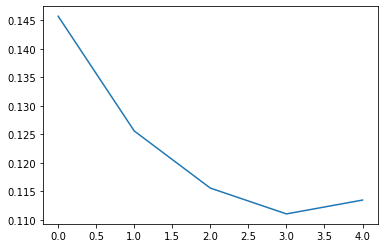

In [30]:
plt.plot(history.history['loss'])

In [31]:
model.evaluate(X_test,y_test,batch_size=128)

40/40 [==============================] - 62s 2s/step - loss: 0.0440 - Accuracy: 0.9834


[0.0439583845436573, 0.9833999872207642]